Para esta práctica podemos usar los datos de Incidencia Delictiva

# Carga de bibliotecas

In [37]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('seaborn-white')
from factor_analyzer import FactorAnalyzer

In [38]:
#Realizaremos primero la carga de datos
# Carga de datos
df = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque 1 Instalacion y tipos de variables/datosSenado/IDEFC_jun2021.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        44352 non-null  int64 
 1   INEGI       44352 non-null  int64 
 2   ENTIDAD     44352 non-null  object
 3   MODALIDAD   44352 non-null  object
 4   TIPO        44352 non-null  object
 5   SUBTIPO     44352 non-null  object
 6   ENERO       44352 non-null  int64 
 7   FEBRERO     44352 non-null  int64 
 8   MARZO       44352 non-null  int64 
 9   ABRIL       44352 non-null  int64 
 10  MAYO        44352 non-null  int64 
 11  JUNIO       44352 non-null  int64 
 12  JULIO       44352 non-null  int64 
 13  AGOSTO      44352 non-null  int64 
 14  SEPTIEMBRE  44352 non-null  int64 
 15  OCTUBRE     44352 non-null  int64 
 16  NOVIEMBRE   44352 non-null  int64 
 17  DICIEMBRE   44352 non-null  int64 
dtypes: int64(14), object(4)
memory usage: 6.1+ MB


In [39]:
df['YEAR'].value_counts()

2016    2112
2006    2112
2014    2112
2013    2112
2012    2112
2011    2112
2010    2112
2009    2112
2008    2112
2007    2112
2005    2112
2017    2112
2004    2112
2003    2112
2002    2112
2001    2112
2000    2112
1999    2112
1998    2112
1997    2112
2015    2112
Name: YEAR, dtype: int64

In [40]:
#Tomaremos datos del 2017

In [41]:
df2=df.loc[df['YEAR']==2017]

In [42]:
df2=df2.copy()
df2.drop(['YEAR','INEGI'],axis='columns', inplace=True)

In [43]:
df3=df2.groupby(['ENTIDAD','MODALIDAD']).sum()

In [44]:
df3.shape

(320, 12)

In [45]:
df3.index = df3.index.set_names(['ENTIDAD','MODALIDAD'])

In [46]:
df3.reset_index(inplace=True)

In [47]:
df3.columns

Index(['ENTIDAD', 'MODALIDAD', 'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
       'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
       'DICIEMBRE'],
      dtype='object')

In [48]:
df3 = df3.reset_index()
df4=pd.melt(df3, id_vars=['ENTIDAD','MODALIDAD'], value_vars=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO',
                                                          'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE',
                                                          'DICIEMBRE'])

In [49]:
df4.drop('variable',axis='columns', inplace=True)

In [50]:
df5=df4.groupby(['ENTIDAD','MODALIDAD']).sum()

In [51]:
df5.index = df5.index.set_names(['ENTIDAD','MODALIDAD'])

In [52]:
df5.reset_index(inplace=True)

In [53]:
df5['MODALIDAD'].value_counts()

ROBO DE GANADO (ABIGEATO)           32
PRIV. DE LA LIBERTAD (SECUESTRO)    32
ROBO EN INSTITUCIONES BANCARIAS     32
ROBO COMUN                          32
ROBO EN CARRETERAS                  32
DELITOS PATRIMONIALES               32
OTROS DELITOS                       32
DELITOS SEXUALES (VIOLACION)        32
HOMICIDIOS                          32
LESIONES                            32
Name: MODALIDAD, dtype: int64

In [54]:
df6=df5.sort_values(by=['ENTIDAD']).pivot(index='ENTIDAD',columns='MODALIDAD',values='value')

In [55]:
df6.corr()

MODALIDAD,DELITOS PATRIMONIALES,DELITOS SEXUALES (VIOLACION),HOMICIDIOS,LESIONES,OTROS DELITOS,PRIV. DE LA LIBERTAD (SECUESTRO),ROBO COMUN,ROBO DE GANADO (ABIGEATO),ROBO EN CARRETERAS,ROBO EN INSTITUCIONES BANCARIAS
MODALIDAD,,,,,,,,,,
DELITOS PATRIMONIALES,1.000000,0.551516,0.480851,0.690263,0.891024,0.310062,0.869989,0.253582,-0.228976,0.437143
DELITOS SEXUALES (VIOLACION),0.551516,1.000000,0.516866,0.836916,0.761520,0.499997,0.702412,0.309605,-0.035017,0.646233
HOMICIDIOS,0.480851,0.516866,1.000000,0.537155,0.612050,0.504468,0.580189,0.335249,0.027587,0.576600
LESIONES,0.690263,0.836916,0.537155,1.000000,0.868959,0.544629,0.881767,0.332996,-0.150207,0.480737
OTROS DELITOS,0.891024,0.761520,0.612050,0.868959,1.000000,0.417693,0.891129,0.321385,-0.204752,0.527342
PRIV. DE LA LIBERTAD (SECUESTRO),0.310062,0.499997,0.504468,0.544629,0.417693,1.000000,0.442783,0.564063,0.033423,0.330281
ROBO COMUN,0.869989,0.702412,0.580189,0.881767,0.891129,0.442783,1.000000,0.263482,-0.106609,0.450575
ROBO DE GANADO (ABIGEATO),0.253582,0.309605,0.335249,0.332996,0.321385,0.564063,0.263482,1.000000,-0.057944,0.127026
ROBO EN CARRETERAS,-0.228976,-0.035017,0.027587,-0.150207,-0.204752,0.033423,-0.106609,-0.057944,1.000000,-0.028853


In [56]:
#Prueba de esfericidad de Bartlett
#Tomado de: https://www.datacamp.com/community/tutorials/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df6)
chi_square_value, p_value

(265.9894232612635, 1.6805511663130698e-33)

In [57]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df6)
kmo_model
#Si es mayor a 0.6, continuar con el procedimiento.

0.7014781287172399

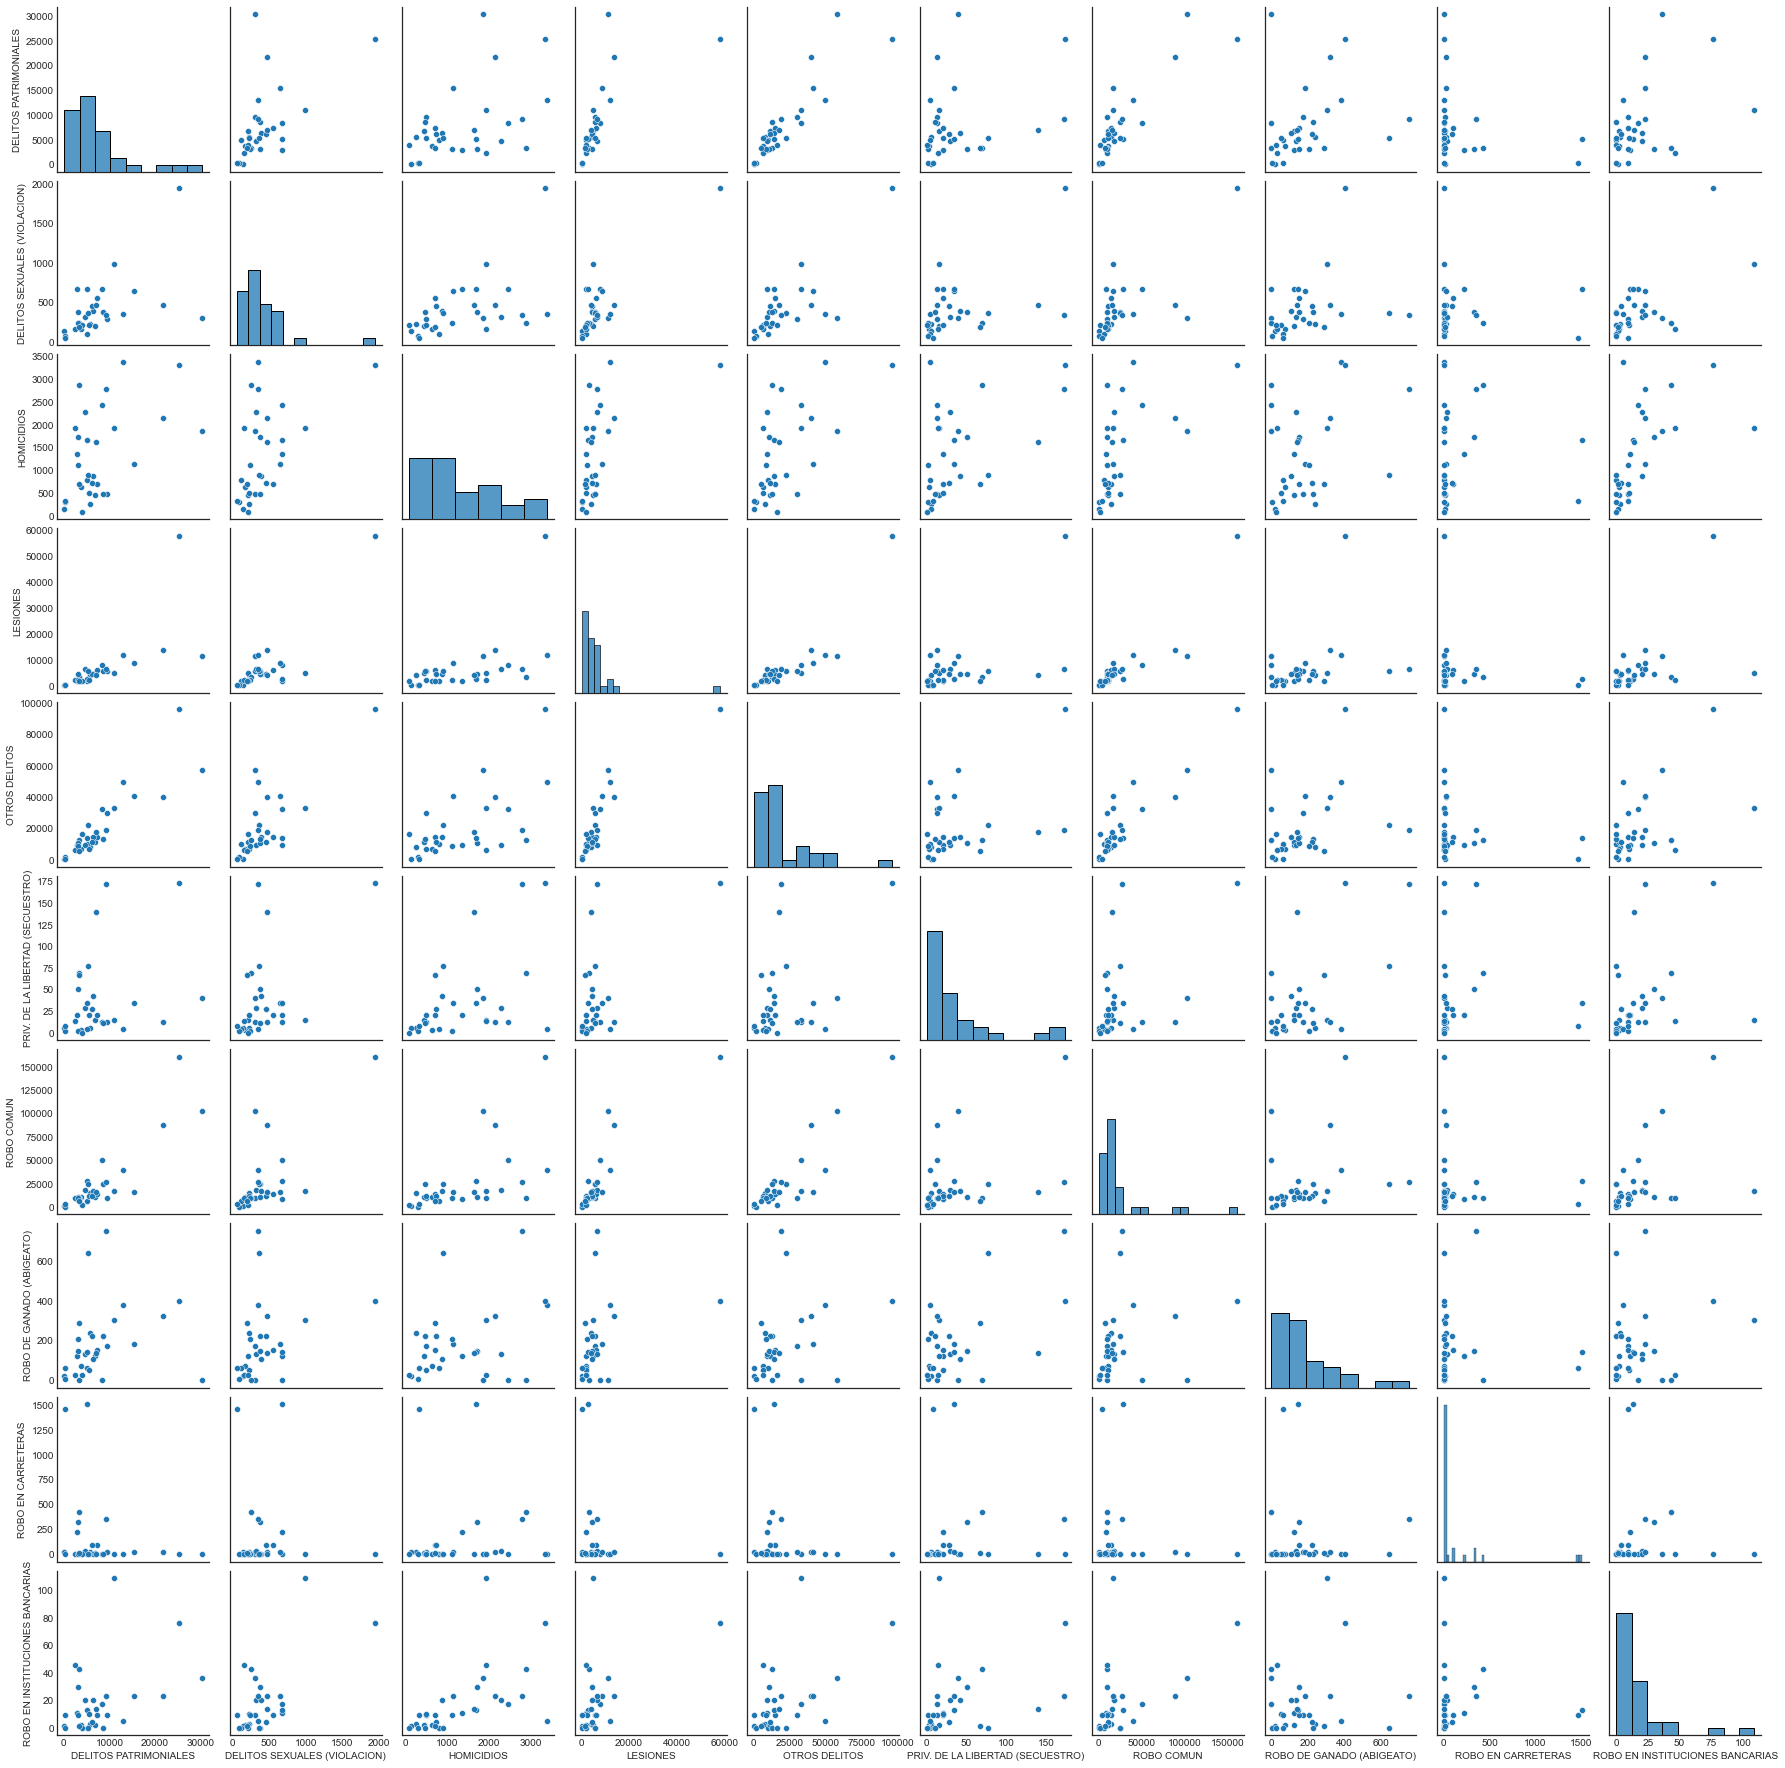

In [58]:
sns.pairplot(df6)

In [59]:
X = pd.DataFrame(scale(df6), index=df6.index, columns=df6.columns)

In [60]:
del df,df2,df3,df4,df5

In [61]:
X.mean()

MODALIDAD
DELITOS PATRIMONIALES               6.938894e-18
DELITOS SEXUALES (VIOLACION)       -1.040834e-17
HOMICIDIOS                          3.122502e-17
LESIONES                           -3.122502e-17
OTROS DELITOS                      -3.469447e-17
PRIV. DE LA LIBERTAD (SECUESTRO)    1.734723e-17
ROBO COMUN                         -1.387779e-17
ROBO DE GANADO (ABIGEATO)          -1.040834e-17
ROBO EN CARRETERAS                  6.938894e-17
ROBO EN INSTITUCIONES BANCARIAS    -1.387779e-17
dtype: float64

In [62]:
#Prueba de Esfericidad de Bartlett
#Ver 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(265.9894232612633, 1.6805511663132128e-33)

In [63]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df6)
eigen_values, vectors = fa.get_eigenvalues()

In [64]:
#help(FactorAnalyzer())

In [65]:
# Ajuste del modelo de ACP (PCA, por sus siglas en inglés) y transformaciónde X para obtener los componentes principales
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10'], index=X.index)
df_plot


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ENTIDAD,,,,,,,,,,
AGUASCALIENTES,-1.338747,-0.345663,-0.766716,-0.345254,-0.342627,0.531073,0.006103,-0.354898,-0.082651,-0.092310
BAJA CALIFORNIA,1.000806,-1.006339,0.775349,0.210400,0.384922,-0.690429,-0.961526,0.363545,-0.372306,0.363205
BAJA CALIFORNIA SUR,-1.737633,-0.665180,-0.212919,-0.048299,-0.130625,-0.178374,-0.143070,-0.191277,-0.051889,0.011139
CAMPECHE,-2.490228,-0.575970,-0.129864,0.062508,-0.630738,-0.304026,-0.006243,-0.246855,-0.008446,0.128447
CHIAPAS,-0.762811,0.248312,0.456603,0.253579,-0.505338,-0.010485,-0.666947,0.525414,-0.491157,-0.007819
CHIHUAHUA,2.235745,0.000703,1.369310,2.891335,-0.278458,2.151434,0.543744,0.130254,-0.054586,0.101502
CIUDAD DE MEXICO,3.202181,-2.427929,0.542558,-1.064712,1.588592,-0.296199,1.649319,0.043700,-0.145154,0.130522
COAHUILA,-0.494291,-0.783814,-0.477930,-0.350405,-0.169736,0.460807,0.206388,0.309225,0.583142,0.038228
COLIMA,-1.704667,-0.720150,-0.245858,-0.099957,0.133837,-0.260727,-0.097516,-0.056602,0.132365,-0.070070


In [66]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df6.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
MODALIDAD,,,,,,,,,,
DELITOS PATRIMONIALES,0.350969,-0.311319,-0.056225,-0.251207,0.330688,0.169928,0.464260,0.277190,-0.149588,-0.510546
DELITOS SEXUALES (VIOLACION),0.362712,0.037440,0.164690,0.084268,-0.547575,0.160072,-0.311462,0.487328,-0.414553,-0.031659
HOMICIDIOS,0.309653,0.218732,0.171308,0.284150,0.633986,-0.311869,-0.466215,0.087903,-0.078134,-0.125678
LESIONES,0.389831,-0.073679,-0.020171,-0.170537,-0.342531,-0.149350,-0.273779,-0.463139,0.384866,-0.485701
OTROS DELITOS,0.399218,-0.204290,-0.010086,-0.146604,0.083331,0.092764,-0.050774,0.337324,0.618304,0.512915
PRIV. DE LA LIBERTAD (SECUESTRO),0.265744,0.512646,-0.231816,0.048278,-0.193639,-0.564765,0.480165,0.137386,0.030336,0.060796
ROBO COMUN,0.387060,-0.179696,0.037577,-0.319181,0.077695,-0.109904,0.039474,-0.478240,-0.499957,0.465041
ROBO DE GANADO (ABIGEATO),0.190079,0.498193,-0.560318,-0.035695,0.126244,0.592836,-0.116979,-0.135462,-0.028797,0.013755
ROBO EN CARRETERAS,-0.061483,0.512329,0.640272,-0.526384,0.055177,0.171303,0.069386,0.006636,0.091330,-0.033490


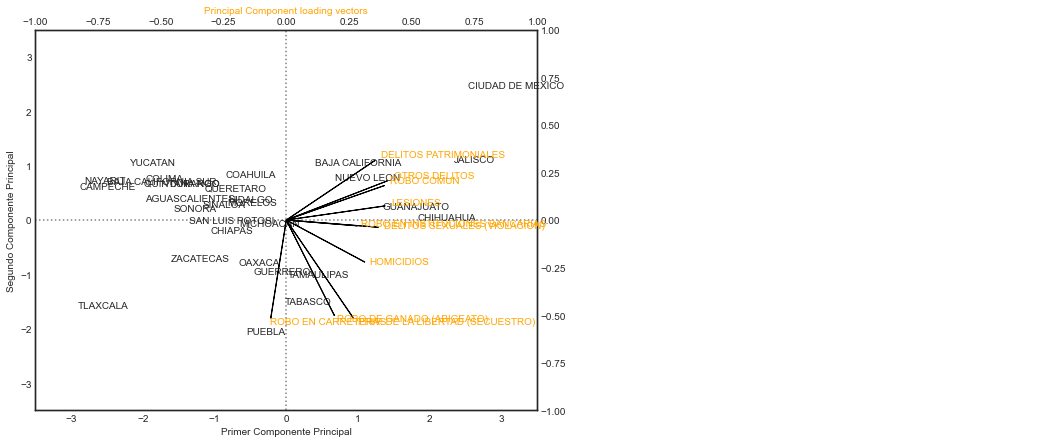

In [68]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Gráfico de los Componentes Principales 1 y 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')
    
# Trace los vectores de carga de los componentes principales, utilizando un segundo eje y.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Trazar etiquetas para vectores. La variable 'a' es un pequeño parámetro de compensación para separar la punta de la flecha y el texto. 
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Grafique los vectores
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,pca_loadings.V1[6], -pca_loadings.V2[6])
ax2.arrow(0,0,pca_loadings.V1[7], -pca_loadings.V2[7])
ax2.arrow(0,0,pca_loadings.V1[8], -pca_loadings.V2[8])
ax2.arrow(0,0,pca_loadings.V1[9], -pca_loadings.V2[9]);

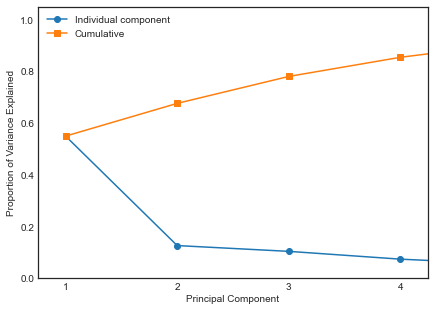

In [32]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

### Análisis Factorial

In [33]:
fa = FactorAnalyzer(4, rotation="varimax", method='minres', use_smc=True)
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

fa.loadings_

array([[ 0.88947414,  0.23091735,  0.31440281,  0.21632714],
       [ 0.21032334,  0.67725936,  0.45547497,  0.2832061 ],
       [ 0.22903351,  0.23705541,  0.49658329,  0.42279881],
       [ 0.41278877,  0.81692996,  0.22896759,  0.32994284],
       [ 0.68180115,  0.51312694,  0.36873704,  0.28097203],
       [-0.00621536,  0.26549342,  0.19453372,  0.83894886],
       [ 0.64521965,  0.54222479,  0.28913988,  0.28317568],
       [ 0.09039589,  0.10198859,  0.04536425,  0.6262454 ],
       [-0.25163517, -0.03525534,  0.03150905,  0.02852127],
       [ 0.0636844 ,  0.25165013,  0.92929345,  0.09199097]])

In [34]:
### Análisis Factorial Confirmatorio
# Basado en: https://semopy.com/
X.columns

Index(['DELITOS PATRIMONIALES', 'DELITOS SEXUALES (VIOLACION)', 'HOMICIDIOS',
       'LESIONES', 'OTROS DELITOS', 'PRIV. DE LA LIBERTAD (SECUESTRO)',
       'ROBO COMUN', 'ROBO DE GANADO (ABIGEATO)', 'ROBO EN CARRETERAS',
       'ROBO EN INSTITUCIONES BANCARIAS'],
      dtype='object', name='MODALIDAD')

In [35]:
X2 = X.set_axis(['Patrimoniales','Sexuales','Homicidios','Lesiones','Otros','Secuestro','roboCom','roboGanado','roboCarret','roboBanco'], axis=1, inplace=False)

In [36]:
# Specify the model relations using the same syntax given before
# Usaremos los datos en df_features, pra no cargar el de la página original
model_spec ='''
  # measurement model
    Y1 =~ Patrimoniales + roboCom
    Y2 =~ Sexuales + Homicidios + Lesiones + Secuestro
    Y3 =~ Otros + roboGanado + roboCarret + roboBanco
'''

In [37]:
import semopy
# Instantiate the model
model = semopy.Model(model_spec)

In [38]:
# Fit the model using the data
model.fit(X2)

SolverResult(fun=2.439146453714648, success=True, n_it=51, x=array([ 0.9862514 ,  0.69343796,  1.10464742,  0.63860972,  0.33026016,
       -0.19978914,  0.54112941,  0.11783965,  0.71410277,  0.96097125,
        0.63751467,  0.14197104,  0.02337459,  0.24613191,  0.08003709,
        0.89338127,  0.69241428,  0.97693898,  0.89580834,  0.78323139,
        0.88219839,  0.68936486,  0.75415419]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [39]:
# Show the results using the inspect method
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Patrimoniales,~,Y1,1.000000,-,-,-
1,roboCom,~,Y1,0.986251,0.099912,9.87119,0.0
2,Sexuales,~,Y2,1.000000,-,-,-
3,Homicidios,~,Y2,0.693438,0.18188,3.81262,0.000138
4,Lesiones,~,Y2,1.104647,0.135881,8.129526,0.0
5,Secuestro,~,Y2,0.638610,0.186164,3.430359,0.000603
6,Otros,~,Y3,1.000000,-,-,-
7,roboGanado,~,Y3,0.330260,0.171923,1.920974,0.054735
8,roboCarret,~,Y3,-0.199789,0.177391,-1.126262,0.260055
9,roboBanco,~,Y3,0.541129,0.156522,3.457201,0.000546


In [40]:
#Plot
g = semopy.semplot(model, "DelitosCFA2.png")